# Lecture 1: Introduction and Course Overview

## MIT 15.401 — Finance Theory I (Prof. Andrew Lo)

---

**Video:** [MIT OCW — Lecture 1: Introduction and Course Overview](https://ocw.mit.edu/courses/15-401-finance-theory-i-fall-2008/pages/video-lectures-and-slides/introduction-and-course-overview/)

**Readings:** Brealey, Myers, and Allen — Chapters 1–2

---

This notebook corresponds to **Session 1** of Andrew Lo's *Finance Theory I* course at MIT Sloan. The lecture sets the stage for the entire course by introducing the motivation behind finance, the key players in the financial system, the fundamental challenges that make finance both difficult and fascinating, a framework for financial analysis, and the six fundamental principles of finance that serve as recurring themes throughout the course.

We complement the theoretical exposition with **Python code** for hands-on illustrations, **visualizations** to build intuition, and **exercises** at the end.

## Table of Contents

1. [Motivation — Why Finance?](#1-motivation)
2. [Dramatis Personae — The Flow Model of the Economy](#2-dramatis-personae)
3. [Fundamental Challenges of Finance](#3-fundamental-challenges)
4. [The Framework of Financial Analysis](#4-framework)
5. [The Importance of Time and Risk](#5-time-and-risk)
6. [Six Fundamental Principles of Finance](#6-six-principles)
7. [Course Overview — The Big Picture](#7-course-overview)
8. [Exercises](#8-exercises)

In [3]:
# ============================================================
# Setup: Import libraries used throughout this notebook
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from IPython.display import display, Markdown

plt.rcParams.update({
    'figure.figsize': (10, 5),
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'font.size': 12,
    'lines.linewidth': 2,
})

print("Libraries loaded successfully.")

Libraries loaded successfully.


---

<a id='1-motivation'></a>
## 1. Motivation — Why Finance?

Andrew Lo opens the lecture with a simple but powerful equation:

$$\text{Mathematics} + \$ \$ \$ = \text{Finance}$$

Finance is fundamentally about **valuing** things — assets, projects, companies, derivatives — and then **managing** them. Every business activity ultimately reduces to two functions:

1. **Valuation of assets** (real/financial, tangible/intangible)
2. **Management of assets** (acquiring/selling)

The famous mantra applies: *"You cannot manage what you cannot measure."* Valuation is the starting point for management — once value is established, management becomes tractable.

### Why Is Finance So Important?

Finance touches every aspect of business and personal life. The financial system serves as the **circulatory system** of the economy: it channels resources from those who have capital to those who need it, enables risk sharing, and facilitates economic growth.

Lo points to legendary figures — Warren Buffett (Berkshire Hathaway), James Simons (Renaissance Technologies), Jack Welch (GE) — as examples of individuals who have mastered the art and science of finance.

### The Power of Financial Literacy

Let's illustrate the impact of finance with a simple example: the dramatic power of **compound interest**, which Albert Einstein allegedly called *"the most powerful force in the universe."*

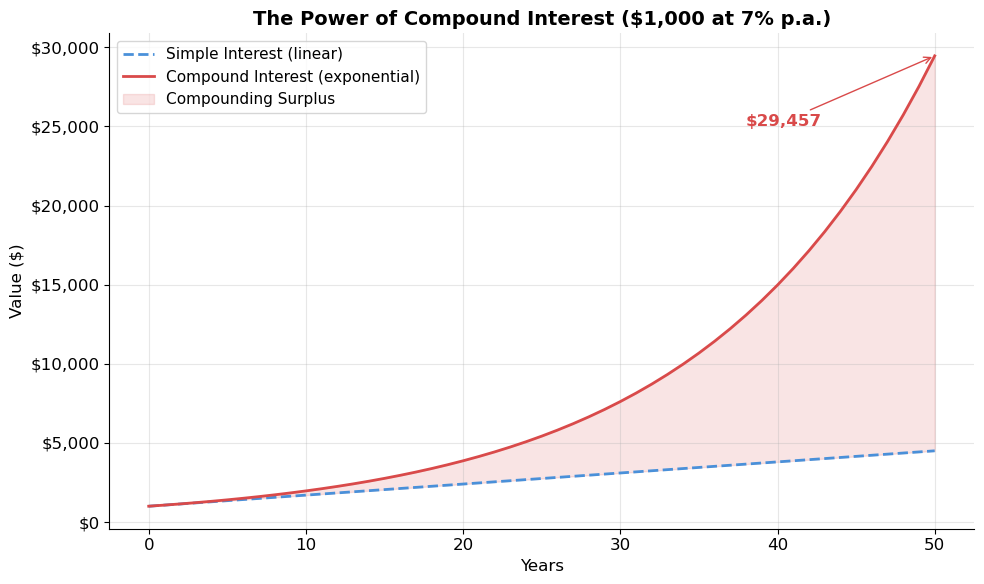

After 50 years at 7%:
  Simple interest:   $  4,500.00
  Compound interest: $ 29,457.03
  Compounding bonus: $ 24,957.03


In [5]:
# ============================================================
# Illustration: The Power of Compound Interest
# ============================================================
years = np.arange(0, 51)
principal = 1000
rate = 0.07  # 7% annual return

simple_interest = principal * (1 + rate * years)
compound_interest = principal * (1 + rate) ** years

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, simple_interest, label='Simple Interest (linear)', linestyle='--', color='#4a90d9')
ax.plot(years, compound_interest, label='Compound Interest (exponential)', color='#d94a4a')
ax.fill_between(years, simple_interest, compound_interest, alpha=0.15, color='#d94a4a',
                label='Compounding Surplus')

ax.set_xlabel('Years')
ax.set_ylabel('Value ($)')
ax.set_title('The Power of Compound Interest ($1,000 at 7% p.a.)', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.legend(fontsize=11)

ax.annotate(f'${compound_interest[-1]:,.0f}',
            xy=(50, compound_interest[-1]), xytext=(38, compound_interest[-1] * 0.85),
            fontsize=12, fontweight='bold', color='#d94a4a',
            arrowprops=dict(arrowstyle='->', color='#d94a4a'))

plt.tight_layout()
plt.show()

print(f"After 50 years at 7%:")
print(f"  Simple interest:   ${simple_interest[-1]:>10,.2f}")
print(f"  Compound interest: ${compound_interest[-1]:>10,.2f}")
print(f"  Compounding bonus: ${compound_interest[-1] - simple_interest[-1]:>10,.2f}")

This is a preview of one of the most important concepts in finance: the **time value of money**. A dollar today is worth more than a dollar tomorrow, and the compounding effect is the engine that drives wealth creation over time. We will formalize this rigorously in Lectures 2–4 on **Present Value Relations**.

---

<a id='2-dramatis-personae'></a>
## 2. Dramatis Personae — The Flow Model of the Economy

Lo introduces the key actors in the financial system through a **flow model of the economy**.

### The Circular Flow

| Actor | Role |
|-------|------|
| **Households** | Supply labor, consume goods, save and invest |
| **Nonfinancial Corporations** | Produce goods and services, invest in real assets |
| **Financial Intermediaries** | Banks, insurance companies, mutual funds — channel capital |
| **Capital Markets** | Stock markets, bond markets, derivatives markets — price discovery |

**Key insight:** Financial markets and intermediaries exist to serve a vital economic function — they transfer resources across time and across states of nature (i.e., under uncertainty).

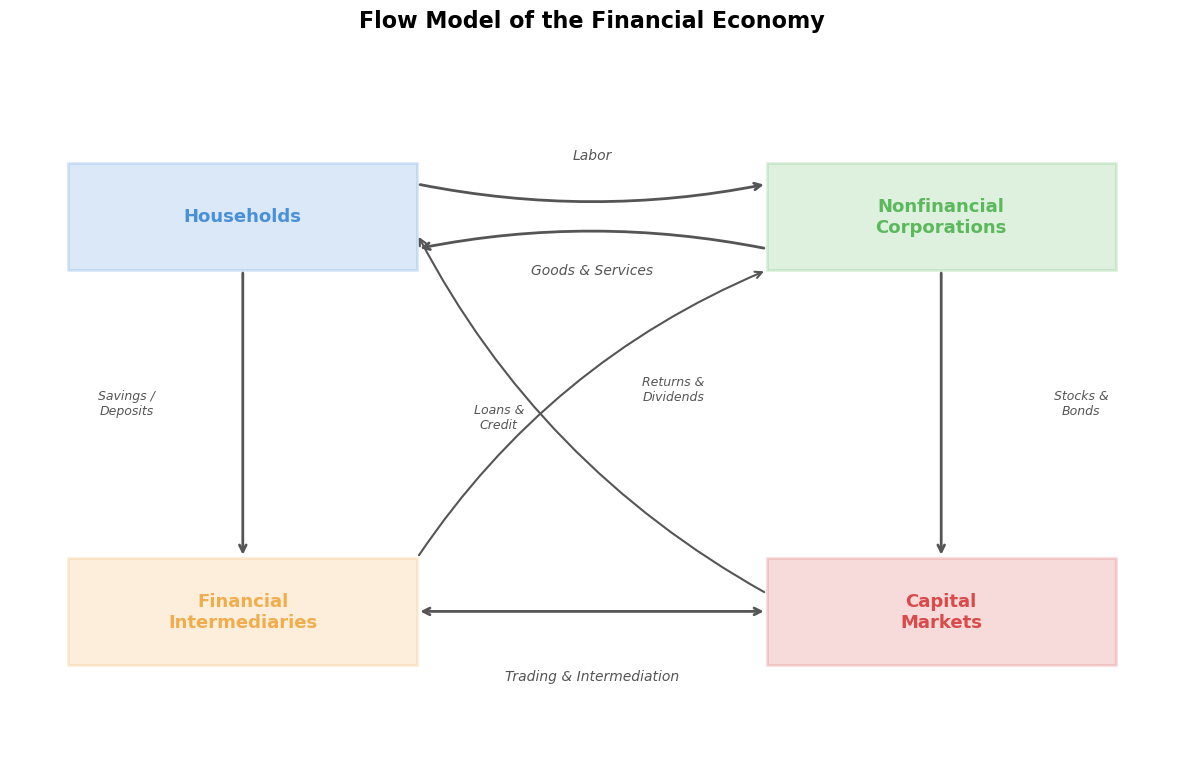

In [8]:
# ============================================================
# Visualization: A Simplified Flow Model of the Economy
# ============================================================
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')
ax.set_title('Flow Model of the Financial Economy', fontsize=16, fontweight='bold', pad=20)

boxes = {
    'Households':               (0.5, 7, 3, 1.5),
    'Nonfinancial\nCorporations': (6.5, 7, 3, 1.5),
    'Financial\nIntermediaries':  (0.5, 1.5, 3, 1.5),
    'Capital\nMarkets':           (6.5, 1.5, 3, 1.5),
}
colors = {'Households': '#4a90d9', 'Nonfinancial\nCorporations': '#5cb85c',
          'Financial\nIntermediaries': '#f0ad4e', 'Capital\nMarkets': '#d94a4a'}

for name, (x, y, w, h) in boxes.items():
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=colors[name],
                          facecolor=colors[name], alpha=0.2, zorder=2)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, name, ha='center', va='center',
            fontsize=13, fontweight='bold', color=colors[name], zorder=3)

arrow_kw = dict(arrowstyle='->', color='#555', lw=2, connectionstyle='arc3,rad=0.1')
ax.annotate('', xy=(6.5, 8.2), xytext=(3.5, 8.2), arrowprops=arrow_kw)
ax.text(5, 8.55, 'Labor', ha='center', fontsize=10, style='italic', color='#555')
ax.annotate('', xy=(3.5, 7.3), xytext=(6.5, 7.3), arrowprops=arrow_kw)
ax.text(5, 6.95, 'Goods & Services', ha='center', fontsize=10, style='italic', color='#555')
ax.annotate('', xy=(2, 3), xytext=(2, 7), arrowprops=dict(arrowstyle='->', color='#555', lw=2))
ax.text(1.0, 5.0, 'Savings /\nDeposits', ha='center', fontsize=9, style='italic', color='#555')
ax.annotate('', xy=(6.5, 7.0), xytext=(3.5, 3.0),
            arrowprops=dict(arrowstyle='->', color='#555', lw=1.5, connectionstyle='arc3,rad=-0.15'))
ax.text(4.2, 4.8, 'Loans &\nCredit', ha='center', fontsize=9, style='italic', color='#555')
ax.annotate('', xy=(8, 3), xytext=(8, 7), arrowprops=dict(arrowstyle='->', color='#555', lw=2))
ax.text(9.2, 5.0, 'Stocks &\nBonds', ha='center', fontsize=9, style='italic', color='#555')
ax.annotate('', xy=(3.5, 7.5), xytext=(6.5, 2.5),
            arrowprops=dict(arrowstyle='->', color='#555', lw=1.5, connectionstyle='arc3,rad=-0.15'))
ax.text(5.7, 5.2, 'Returns &\nDividends', ha='center', fontsize=9, style='italic', color='#555')
ax.annotate('', xy=(6.5, 2.25), xytext=(3.5, 2.25),
            arrowprops=dict(arrowstyle='<->', color='#555', lw=2))
ax.text(5, 1.3, 'Trading & Intermediation', ha='center', fontsize=10, style='italic', color='#555')

plt.tight_layout()
plt.show()

### Personal vs. Corporate Financial Decisions

Lo emphasizes that the framework applies at both the **personal** and **corporate** level:

**Personal Financial Decisions:** Cash raised from financial institutions → invested in real assets (education, housing) → generated by labor → consumed and reinvested → invested in financial assets. **Objective:** Maximize lifetime expected utility.

**Corporate Financial Decisions:** Cash raised from investors (stocks, bonds) → invested in real assets (factories, R&D) → generated from operations → reinvested → returned to investors (dividends, buybacks). **Objective:** Maximize shareholder value.

A crucial insight: **valuation is generally independent of objectives**. Whether you want to buy or sell an asset, its value is the same — financial markets perform a **price discovery** function that aggregates information from all participants.

---

<a id='3-fundamental-challenges'></a>
## 3. Fundamental Challenges of Finance

### 3.1 The Language of Finance: Accounting

Accounting is the **language** of finance. The three fundamental financial statements form the backbone:

| Statement | What It Tells You | Key Question |
|-----------|------------------|--------------|
| **Balance Sheet** | What the firm owns and owes at a point in time | What is the firm's financial position? |
| **Income Statement** | Revenues, expenses, and profit over a period | Is the firm profitable? |
| **Cash Flow Statement** | Actual cash inflows and outflows over a period | Does the firm generate cash? |

The fundamental accounting identity:

$$\boxed{\text{Assets} = \text{Liabilities} + \text{Equity}}$$

### 3.2 Cash Flow vs. Accounting Profit

A key theme: **cash flow is king**. Accounting profit can be manipulated, but cash flows represent actual economic value.

In [11]:
# ============================================================
# Example: Accounting Profit vs. Cash Flow
# ============================================================
data = {
    'Item': [
        'Revenue (on credit)', 'Cash collected from customers',
        'Cost of goods sold', 'Cash paid for inventory',
        'Depreciation expense', 'Capital expenditure (cash)',
        '', 'ACCOUNTING PROFIT', 'CASH FLOW'
    ],
    'Income Statement': [
        100_000, '—', -60_000, '—', -10_000, '—', '', 30_000, '—'
    ],
    'Cash Flow Statement': [
        '—', 70_000, '—', -80_000, '—', -50_000, '', '—', -60_000
    ]
}
df = pd.DataFrame(data)
print("=" * 65)
print("ACCOUNTING PROFIT vs. CASH FLOW — A Cautionary Example")
print("=" * 65)
print(df.to_string(index=False))
print("=" * 65)
print("\nThe firm shows a $30,000 PROFIT on its income statement,")
print("but its actual cash flow is NEGATIVE $60,000!")
print("\n→ This is why finance focuses on CASH FLOWS, not accounting profits.")

ACCOUNTING PROFIT vs. CASH FLOW — A Cautionary Example
                         Item Income Statement Cash Flow Statement
          Revenue (on credit)           100000                   —
Cash collected from customers                —               70000
           Cost of goods sold           -60000                   —
      Cash paid for inventory                —              -80000
         Depreciation expense           -10000                   —
   Capital expenditure (cash)                —              -50000
                                                                  
            ACCOUNTING PROFIT            30000                   —
                    CASH FLOW                —              -60000

The firm shows a $30,000 PROFIT on its income statement,
but its actual cash flow is NEGATIVE $60,000!

→ This is why finance focuses on CASH FLOWS, not accounting profits.


---

<a id='4-framework'></a>
## 4. The Framework of Financial Analysis

### The Balance Sheet — A Snapshot

$$\text{Assets} = \text{Liabilities} + \text{Shareholders' Equity}$$

Or equivalently: $\text{Shareholders' Equity} = \text{Assets} - \text{Liabilities}$ (the **net worth** from shareholders' perspective).

### The Income Statement — A Movie

$$\text{Net Income} = \text{Revenue} - \text{Expenses} - \text{Taxes}$$

### The Cash Flow Statement — The Real Story

$$\text{Cash Flow} = \text{Cash from Operations} + \text{Cash from Investing} + \text{Cash from Financing}$$

C:\Users\mjfmourey\AppData\Local\Temp\ipykernel_65876\1014374855.py:55: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\mjfmourey\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


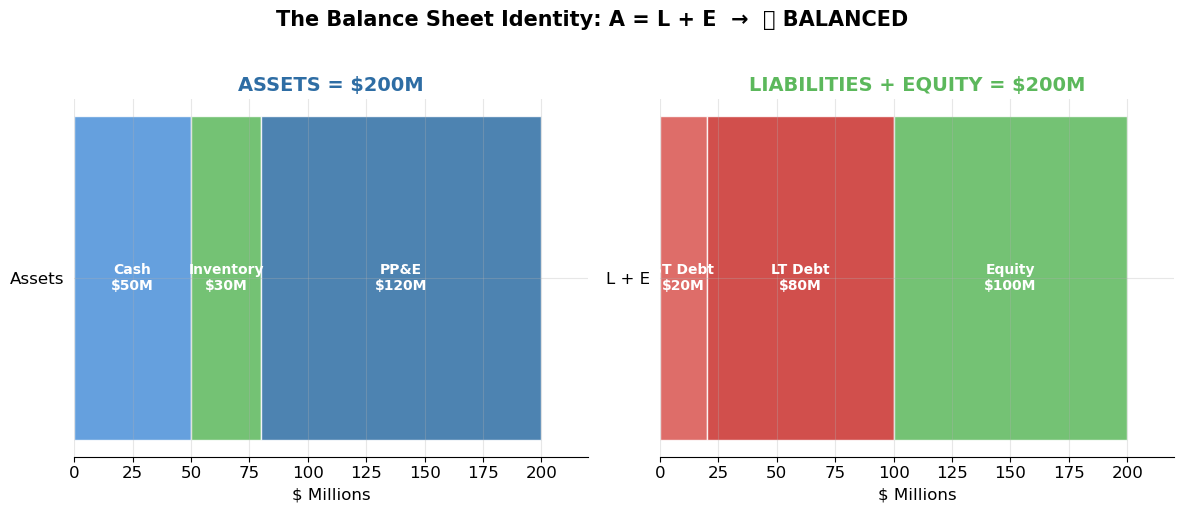

In [13]:
# ============================================================
# Interactive Balance Sheet — Change Parameters and Re-run
# ============================================================
# ▶ MODIFY THESE PARAMETERS AND RE-RUN THE CELL
cash = 50        # Cash ($M)
inventory = 30   # Inventory ($M)
ppe = 120        # Property, Plant & Equipment ($M)
short_term_debt = 20   # Short-term debt ($M)
long_term_debt = 80    # Long-term debt ($M)
# ============================================================

total_assets = cash + inventory + ppe
total_liabilities = short_term_debt + long_term_debt
equity = total_assets - total_liabilities

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Assets side
left = 0
for val, label, color in zip([cash, inventory, ppe],
                              [f'Cash\n${cash}M', f'Inventory\n${inventory}M', f'PP&E\n${ppe}M'],
                              ['#4a90d9', '#5cb85c', '#2e6da4']):
    axes[0].barh(['Assets'], [val], left=left, color=color, edgecolor='white', height=0.6, alpha=0.85)
    if val > 10:
        axes[0].text(left + val/2, 0, label, ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    left += val
axes[0].set_title(f'ASSETS = ${total_assets}M', fontsize=14, fontweight='bold', color='#2e6da4')

# Liabilities + Equity side
left = 0
for val, label, color in zip([short_term_debt, long_term_debt, max(equity, 0)],
                              [f'ST Debt\n${short_term_debt}M', f'LT Debt\n${long_term_debt}M', f'Equity\n${equity}M'],
                              ['#d9534f', '#c9302c', '#5cb85c' if equity >= 0 else '#d9534f']):
    axes[1].barh(['L + E'], [val], left=left, color=color, edgecolor='white', height=0.6, alpha=0.85)
    if val > 10:
        axes[1].text(left + val/2, 0, label, ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    left += val

title_color = '#5cb85c' if equity >= 0 else '#d9534f'
axes[1].set_title(f'LIABILITIES + EQUITY = ${total_liabilities + equity}M', fontsize=14, fontweight='bold', color=title_color)

for ax in axes:
    ax.spines['left'].set_visible(False)
    ax.tick_params(left=False)
    ax.set_xlabel('$ Millions')
    ax.set_xlim(0, max(total_assets, total_liabilities + max(equity, 0)) * 1.1)

status = "✅ BALANCED" if abs(total_assets - (total_liabilities + equity)) < 0.01 else "❌ ERROR"
fig.suptitle(f'The Balance Sheet Identity: A = L + E  →  {status}', fontsize=15, fontweight='bold', y=1.02)

if equity < 0:
    fig.text(0.5, -0.05, '⚠️  NEGATIVE EQUITY — The firm is technically insolvent!',
             ha='center', fontsize=13, color='#d9534f', fontweight='bold')

plt.tight_layout()
plt.show()

**Try it:** Change the debt values in the parameter cell above until equity becomes negative — this illustrates **insolvency** (liabilities exceed assets).

---

<a id='5-time-and-risk'></a>
## 5. The Importance of Time and Risk

Lo identifies **two factors** that make finance particularly challenging:

### 5.1 Time

Cash flows now are fundamentally different from cash flows later. The core question: **how do we compare cash flows at different points in time?**

$$\text{Future Value:} \quad FV = PV \times (1 + r)^t$$
$$\text{Present Value:} \quad PV = \frac{FV}{(1 + r)^t}$$

### 5.2 Risk

Under perfect certainty, finance theory would be complete. **Risk** creates significant challenges because future cash flows are uncertain, individuals have different attitudes toward risk, and markets must price risk.

Lo's approach: (1) Use **historical data**, (2) Use **mathematics**.

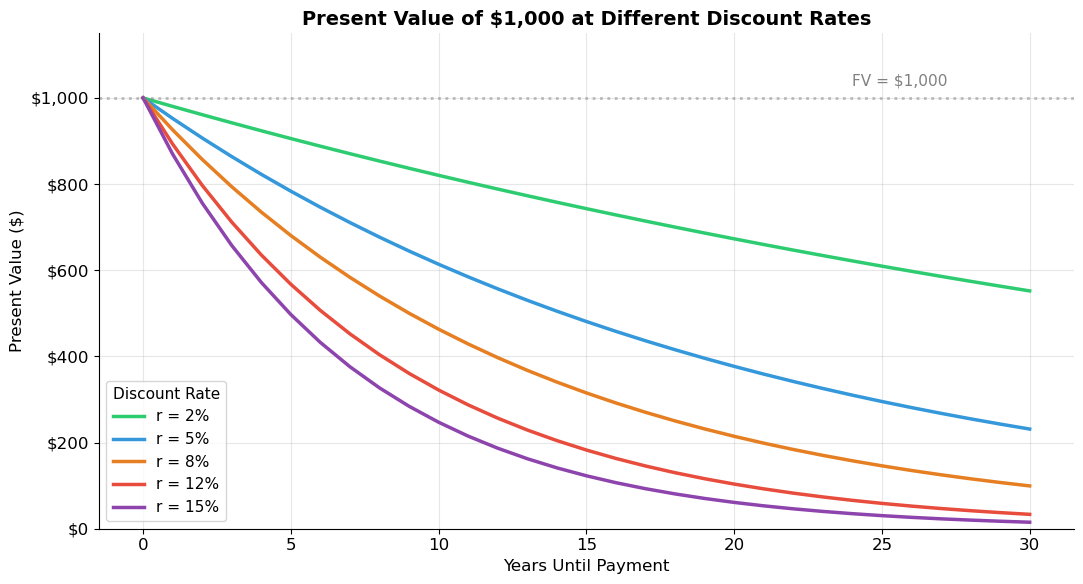

In [16]:
# ============================================================
# Impact of Discount Rates on Present Value
# ============================================================
# ▶ MODIFY THESE PARAMETERS AND RE-RUN THE CELL
future_value = 1000
max_years = 30
# ============================================================

years = np.arange(0, max_years + 1)
rates = [0.02, 0.05, 0.08, 0.12, 0.15]
colors = ['#2ecc71', '#3498db', '#e67e22', '#e74c3c', '#8e44ad']

fig, ax = plt.subplots(figsize=(11, 6))

for r, color in zip(rates, colors):
    pv = future_value / (1 + r) ** years
    ax.plot(years, pv, label=f'r = {r:.0%}', color=color, linewidth=2.5)

ax.axhline(y=future_value, color='gray', linestyle=':', alpha=0.5)
ax.text(max_years * 0.8, future_value * 1.03, f'FV = ${future_value:,.0f}', fontsize=11, color='gray')

ax.set_xlabel('Years Until Payment', fontsize=12)
ax.set_ylabel('Present Value ($)', fontsize=12)
ax.set_title(f'Present Value of ${future_value:,.0f} at Different Discount Rates', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.legend(title='Discount Rate', fontsize=11, title_fontsize=11)
ax.set_ylim(0, future_value * 1.15)

plt.tight_layout()
plt.show()

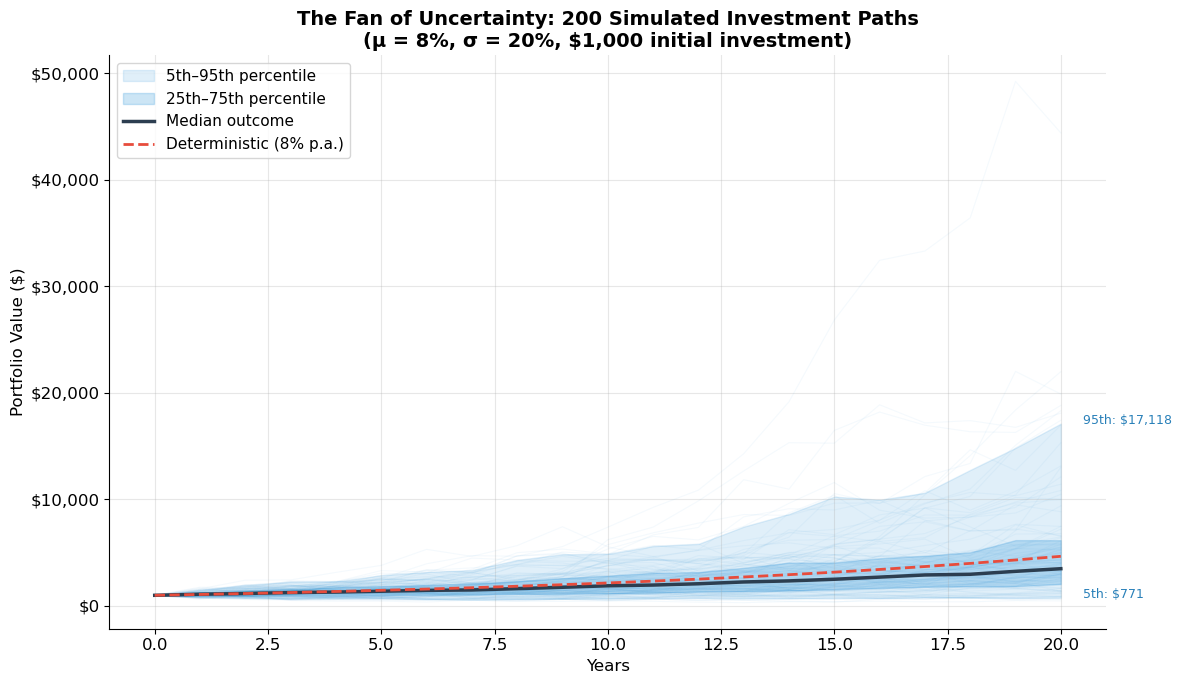

After 20 years — Distribution of final portfolio values:
  Mean:            $     5,311
  Median:          $     3,497
  Std Dev:         $     5,546
  5th percentile:  $       771
  95th percentile: $    17,118
  Probability of loss: 9.0%


In [17]:
# ============================================================
# Simulation: The Fan of Uncertainty — Random Investment Paths
# ============================================================
np.random.seed(42)

initial = 1000
mu = 0.08       # Expected annual return
sigma = 0.20    # Annual volatility
T = 20          # Time horizon
n_paths = 200   # Number of simulations

years = np.arange(0, T + 1)
log_returns = np.random.normal(mu - 0.5 * sigma**2, sigma, size=(n_paths, T))
log_prices = np.column_stack([np.zeros(n_paths), np.cumsum(log_returns, axis=1)])
paths = initial * np.exp(log_prices)

risk_free_path = initial * (1 + mu) ** years
p5 = np.percentile(paths, 5, axis=0)
p25 = np.percentile(paths, 25, axis=0)
p50 = np.percentile(paths, 50, axis=0)
p75 = np.percentile(paths, 75, axis=0)
p95 = np.percentile(paths, 95, axis=0)

fig, ax = plt.subplots(figsize=(12, 7))

for i in range(min(n_paths, 100)):
    ax.plot(years, paths[i], color='#3498db', alpha=0.05, linewidth=0.8)

ax.fill_between(years, p5, p95, alpha=0.15, color='#3498db', label='5th–95th percentile')
ax.fill_between(years, p25, p75, alpha=0.25, color='#3498db', label='25th–75th percentile')
ax.plot(years, p50, color='#2c3e50', linewidth=2.5, label='Median outcome')
ax.plot(years, risk_free_path, color='#e74c3c', linewidth=2, linestyle='--',
        label=f'Deterministic ({mu:.0%} p.a.)')

ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('Portfolio Value ($)', fontsize=12)
ax.set_title(f'The Fan of Uncertainty: {n_paths} Simulated Investment Paths\n'
             f'(μ = {mu:.0%}, σ = {sigma:.0%}, $1,000 initial investment)',
             fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.legend(fontsize=11, loc='upper left')

ax.annotate(f'95th: ${p95[-1]:,.0f}', xy=(T, p95[-1]), xytext=(T+0.5, p95[-1]), fontsize=9, color='#2980b9')
ax.annotate(f'5th: ${p5[-1]:,.0f}', xy=(T, p5[-1]), xytext=(T+0.5, p5[-1]), fontsize=9, color='#2980b9')

plt.tight_layout()
plt.show()

final_values = paths[:, -1]
print(f"After {T} years — Distribution of final portfolio values:")
print(f"  Mean:            ${np.mean(final_values):>10,.0f}")
print(f"  Median:          ${np.median(final_values):>10,.0f}")
print(f"  Std Dev:         ${np.std(final_values):>10,.0f}")
print(f"  5th percentile:  ${np.percentile(final_values, 5):>10,.0f}")
print(f"  95th percentile: ${np.percentile(final_values, 95):>10,.0f}")
print(f"  Probability of loss: {np.mean(final_values < initial):.1%}")

**The fan of uncertainty** reveals a fundamental truth: as the time horizon increases, the range of possible outcomes **widens dramatically**. Risk management is essential — it's not about avoiding risk, but about understanding and managing it.

---

<a id='6-six-principles'></a>
## 6. Six Fundamental Principles of Finance

These six principles serve as the intellectual backbone of the entire course.

---

### P1: There Is No Such Thing As A Free Lunch

The **no-arbitrage principle** — the most powerful idea in all of finance. An arbitrage is a riskless profit with no investment. In well-functioning markets, arbitrage opportunities are eliminated almost instantaneously.

$$\text{If } CF_A(s) = CF_B(s) \; \forall s, \text{ then } P_A = P_B \quad (\text{Law of One Price})$$

This principle is the foundation for option pricing (Black-Scholes), fixed-income arbitrage, and most of modern derivatives pricing.

### P2: Other Things Equal, Individuals...

- **Prefer more money to less** (non-satiation): $U(W + \Delta) > U(W)$ for $\Delta > 0$
- **Prefer money now to later** (impatience)
- **Prefer to avoid risk** (risk aversion): $U(E[W]) > E[U(W)]$ for concave $U$

### P3: All Agents Act To Further Their Own Self-Interest

Rational self-interest + competition → efficient outcomes (Adam Smith's "invisible hand"). But also creates **agency problems**.

### P4: Financial Market Prices Shift to Equalize Supply and Demand

Market prices reflect **equilibrium** — a powerful information aggregation mechanism.

### P5: Financial Markets Are Highly Adaptive and Competitive

Markets evolve rapidly. Related to the **Efficient Market Hypothesis** (EMH).

### P6: Risk-Sharing and Frictions Are Central to Financial Innovation

Every major financial product exists because of the desire to share risk more efficiently and overcome market frictions.

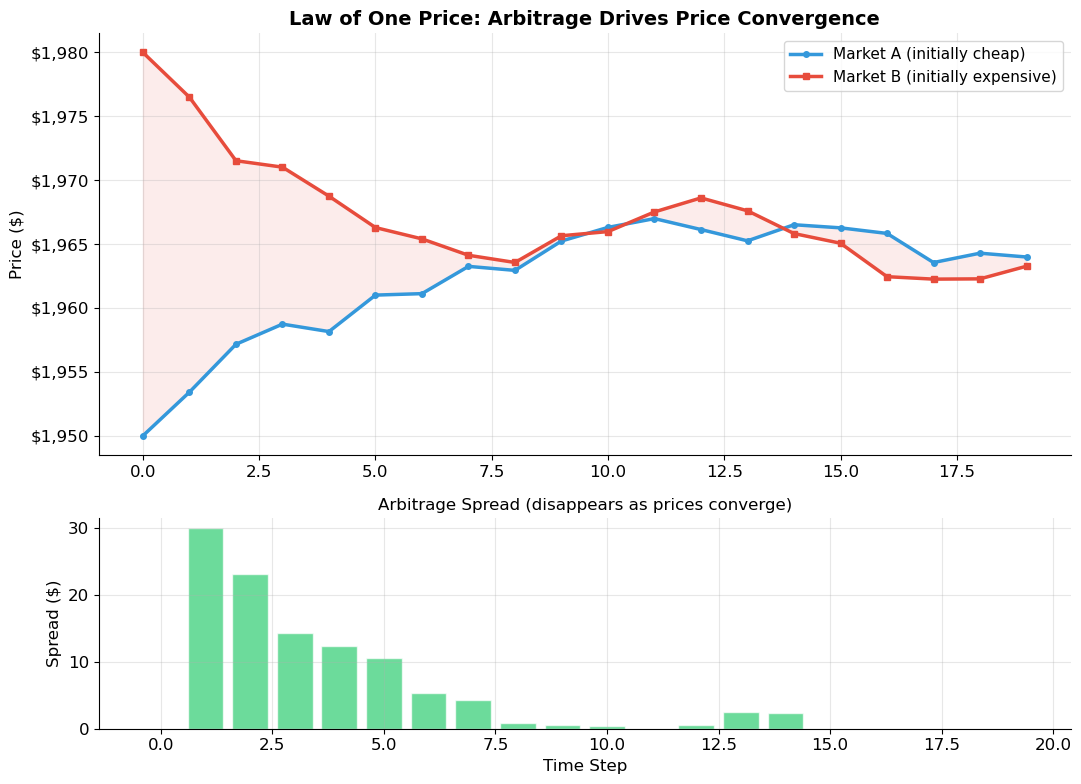

In [20]:
# ============================================================
# Illustration of P1: No-Arbitrage — Price Convergence
# ============================================================
np.random.seed(123)

price_A_init, price_B_init = 1950, 1980
convergence_speed = 0.3
n_steps = 20

price_A, price_B, profit = [price_A_init], [price_B_init], [0]

for t in range(1, n_steps):
    spread = price_B[-1] - price_A[-1]
    adjustment = spread * convergence_speed
    price_A.append(price_A[-1] + adjustment * 0.5 + np.random.normal(0, 1))
    price_B.append(price_B[-1] - adjustment * 0.5 + np.random.normal(0, 1))
    profit.append(max(spread, 0))

steps = range(n_steps)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 8), height_ratios=[2, 1])

ax1.plot(steps, price_A, label='Market A (initially cheap)', color='#3498db', linewidth=2.5, marker='o', markersize=4)
ax1.plot(steps, price_B, label='Market B (initially expensive)', color='#e74c3c', linewidth=2.5, marker='s', markersize=4)
ax1.fill_between(steps, price_A, price_B, alpha=0.1, color='#e74c3c')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_title('Law of One Price: Arbitrage Drives Price Convergence', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

ax2.bar(steps, profit, color='#2ecc71', alpha=0.7, edgecolor='white')
ax2.set_xlabel('Time Step', fontsize=12)
ax2.set_ylabel('Spread ($)', fontsize=12)
ax2.set_title('Arbitrage Spread (disappears as prices converge)', fontsize=12)

plt.tight_layout()
plt.show()

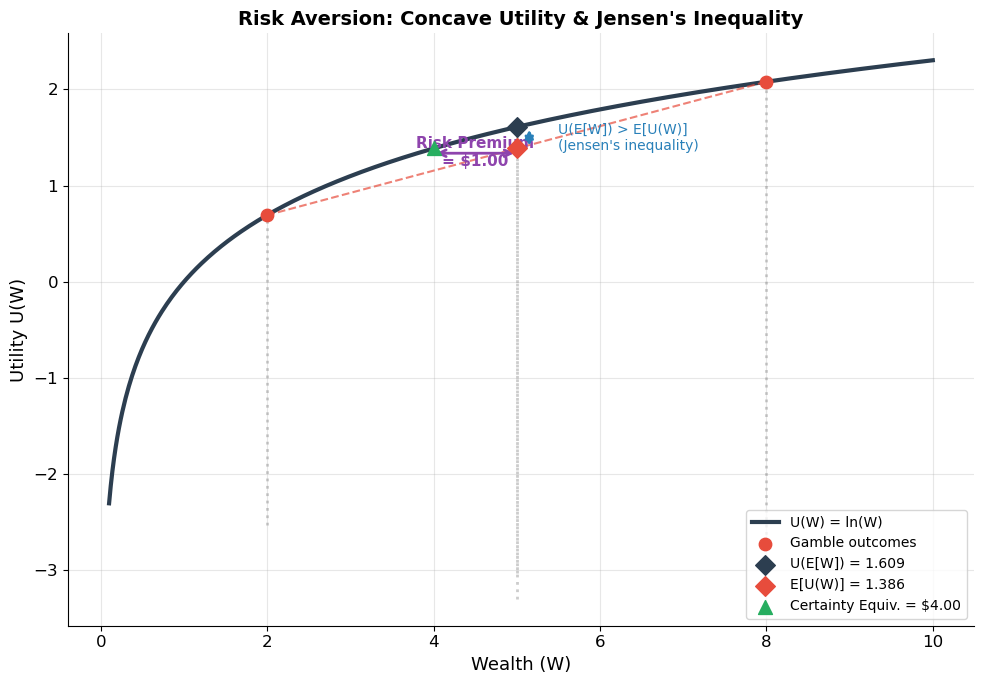

Gamble: 50% chance of $2, 50% chance of $8
Expected wealth E[W]     = $5.00
U(E[W])                  = 1.6094  (utility of getting E[W] for sure)
E[U(W)]                  = 1.3863  (expected utility of the gamble)
Certainty Equivalent CE  = $4.00
Risk Premium             = E[W] - CE = $1.00

→ A risk-averse agent would pay up to $1.00 to avoid the gamble.


In [21]:
# ============================================================
# Illustration of P2: Risk Aversion via Utility Functions
# ============================================================
W = np.linspace(0.1, 10, 500)
U = np.log(W)

# Gamble: 50% chance of W=2, 50% chance of W=8
W_low, W_high = 2, 8
p = 0.5
E_W = p * W_low + (1 - p) * W_high    # Expected wealth = 5
E_U = p * np.log(W_low) + (1 - p) * np.log(W_high)  # Expected utility
U_E = np.log(E_W)                       # Utility of expected wealth
CE = np.exp(E_U)                         # Certainty equivalent

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(W, U, color='#2c3e50', linewidth=3, label='U(W) = ln(W)')
ax.plot([W_low, W_high], [np.log(W_low), np.log(W_high)],
        color='#e74c3c', linewidth=1.5, linestyle='--', alpha=0.7)

ax.scatter([W_low, W_high], [np.log(W_low), np.log(W_high)],
          color='#e74c3c', s=80, zorder=5, label='Gamble outcomes')
ax.scatter([E_W], [U_E], color='#2c3e50', s=100, zorder=5, marker='D',
          label=f'U(E[W]) = {U_E:.3f}')
ax.scatter([E_W], [E_U], color='#e74c3c', s=100, zorder=5, marker='D',
          label=f'E[U(W)] = {E_U:.3f}')
ax.scatter([CE], [E_U], color='#27ae60', s=100, zorder=5, marker='^',
          label=f'Certainty Equiv. = ${CE:.2f}')

ax.annotate('', xy=(CE, E_U - 0.05), xytext=(E_W, E_U - 0.05),
            arrowprops=dict(arrowstyle='<->', color='#8e44ad', lw=2))
ax.text((CE + E_W) / 2, E_U - 0.18, f'Risk Premium\n= ${E_W - CE:.2f}',
        ha='center', fontsize=11, color='#8e44ad', fontweight='bold')

ax.annotate('', xy=(E_W + 0.15, U_E), xytext=(E_W + 0.15, E_U),
            arrowprops=dict(arrowstyle='<->', color='#2980b9', lw=2))
ax.text(E_W + 0.5, (U_E + E_U) / 2, "U(E[W]) > E[U(W)]\n(Jensen's inequality)",
        fontsize=10, color='#2980b9', va='center')

for w, u in [(W_low, np.log(W_low)), (W_high, np.log(W_high)), (E_W, U_E), (E_W, E_U)]:
    ax.plot([w, w], [ax.get_ylim()[0] if ax.get_ylim()[0] < u else u - 0.5, u], color='gray', linestyle=':', alpha=0.4)

ax.set_xlabel('Wealth (W)', fontsize=13)
ax.set_ylabel('Utility U(W)', fontsize=13)
ax.set_title("Risk Aversion: Concave Utility & Jensen's Inequality", fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='lower right')

plt.tight_layout()
plt.show()

print(f"Gamble: 50% chance of ${W_low}, 50% chance of ${W_high}")
print(f"Expected wealth E[W]     = ${E_W:.2f}")
print(f"U(E[W])                  = {U_E:.4f}  (utility of getting E[W] for sure)")
print(f"E[U(W)]                  = {E_U:.4f}  (expected utility of the gamble)")
print(f"Certainty Equivalent CE  = ${CE:.2f}")
print(f"Risk Premium             = E[W] - CE = ${E_W - CE:.2f}")
print(f"\n→ A risk-averse agent would pay up to ${E_W - CE:.2f} to avoid the gamble.")

### Understanding Risk Aversion

For a **risk-averse** individual with concave utility, Jensen's inequality gives us:

$$U\big(E[W]\big) > E\big[U(W)\big]$$

The **certainty equivalent** (CE) is the guaranteed amount giving the same utility as the gamble: $U(CE) = E[U(W)]$

The **risk premium** is: $\text{Risk Premium} = E[W] - CE > 0$

This is why risky assets must offer **higher expected returns** — investors demand compensation for bearing risk.

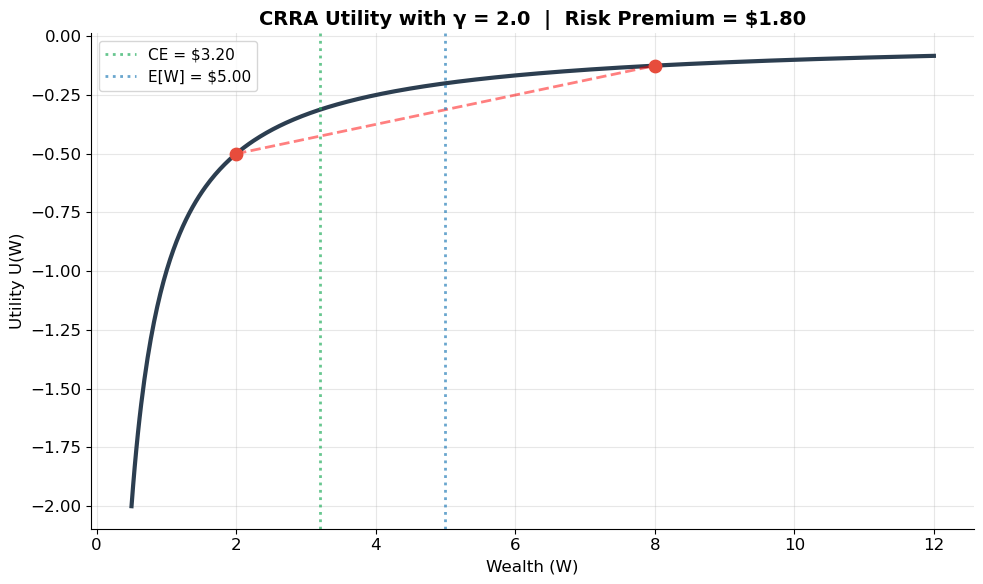

Try changing gamma to see how risk aversion affects the premium:
  γ = 2.0 → Risk Premium = $1.80


In [23]:
# ============================================================
# Explore Risk Aversion with Different CRRA Parameters
# ============================================================
# ▶ MODIFY gamma AND RE-RUN TO SEE HOW RISK AVERSION CHANGES
gamma = 2.0      # Risk aversion coefficient (try: 0.5, 1, 2, 5, 10)
W_low = 2.0
W_high = 8.0
# ============================================================

W = np.linspace(0.5, 12, 500)

if abs(gamma - 1.0) < 0.01:
    U = np.log(W)
    u_low, u_high = np.log(W_low), np.log(W_high)
    CE = np.exp(0.5 * u_low + 0.5 * u_high)
else:
    U = W**(1 - gamma) / (1 - gamma)
    u_low = W_low**(1 - gamma) / (1 - gamma)
    u_high = W_high**(1 - gamma) / (1 - gamma)
    E_U = 0.5 * u_low + 0.5 * u_high
    CE = (E_U * (1 - gamma))**(1 / (1 - gamma))

E_W = 0.5 * W_low + 0.5 * W_high
risk_premium = E_W - CE

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(W, U, color='#2c3e50', linewidth=3)
ax.scatter([W_low, W_high], [u_low, u_high], color='#e74c3c', s=80, zorder=5)
ax.plot([W_low, W_high], [u_low, u_high], 'r--', alpha=0.5)
ax.axvline(CE, color='#27ae60', linestyle=':', alpha=0.7, label=f'CE = ${CE:.2f}')
ax.axvline(E_W, color='#2980b9', linestyle=':', alpha=0.7, label=f'E[W] = ${E_W:.2f}')

ax.set_xlabel('Wealth (W)', fontsize=12)
ax.set_ylabel('Utility U(W)', fontsize=12)
ax.set_title(f'CRRA Utility with γ = {gamma:.1f}  |  Risk Premium = ${risk_premium:.2f}', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"Try changing gamma to see how risk aversion affects the premium:")
print(f"  γ = {gamma:.1f} → Risk Premium = ${risk_premium:.2f}")

---

<a id='7-course-overview'></a>
## 7. Course Overview — The Big Picture

Lo organizes the course into **four major sections** plus a capstone:

### A. Introduction
- Fundamental challenges, framework, six principles, time value of money

### B. Valuation
- NPV, pricing stocks, bonds, futures, forwards, and options

### C. Risk
- Measuring risk, Portfolio Theory (Markowitz), CAPM, APT

### D. Corporate Finance
- Capital budgeting and project finance

### Final Lecture: Market Efficiency
- EMH, behavioral biases, theory vs. practice

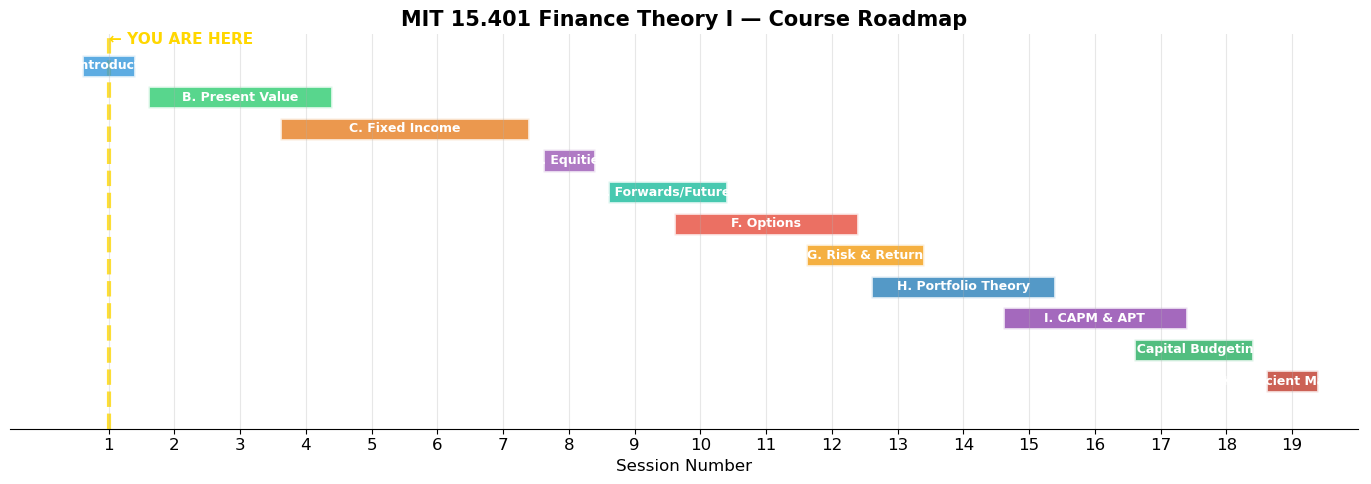

In [25]:
# ============================================================
# Course Roadmap Visualization
# ============================================================
sessions = {
    'A. Introduction':     ([1],       '#3498db'),
    'B. Present Value':    ([2, 3, 4], '#2ecc71'),
    'C. Fixed Income':     ([4, 5, 6, 7], '#e67e22'),
    'D. Equities':         ([8],       '#9b59b6'),
    'E. Forwards/Futures': ([9, 10],   '#1abc9c'),
    'F. Options':          ([10, 11, 12], '#e74c3c'),
    'G. Risk & Return':    ([12, 13],  '#f39c12'),
    'H. Portfolio Theory': ([13, 14, 15], '#2980b9'),
    'I. CAPM & APT':       ([15, 16, 17], '#8e44ad'),
    'J. Capital Budgeting':([17, 18],  '#27ae60'),
    'K. Efficient Markets':([19],      '#c0392b'),
}

fig, ax = plt.subplots(figsize=(14, 5))
y_pos = 0
for name, (sess, color) in sessions.items():
    start = min(sess) - 0.4
    width = max(sess) - min(sess) + 0.8
    rect = plt.Rectangle((start, y_pos - 0.35), width, 0.7,
                          facecolor=color, alpha=0.8, edgecolor='white', linewidth=2)
    ax.add_patch(rect)
    ax.text(start + width/2, y_pos, name, ha='center', va='center',
            fontsize=9, fontweight='bold', color='white')
    y_pos -= 1

ax.set_xlim(-0.5, 20)
ax.set_ylim(y_pos - 0.5, 1)
ax.set_xlabel('Session Number', fontsize=12)
ax.set_xticks(range(1, 20))
ax.set_yticks([])
ax.set_title('MIT 15.401 Finance Theory I — Course Roadmap', fontsize=15, fontweight='bold')
ax.spines['left'].set_visible(False)
ax.axvline(x=1, color='gold', linewidth=3, linestyle='--', alpha=0.8, zorder=0)
ax.text(1, 0.7, '← YOU ARE HERE', fontsize=11, fontweight='bold', color='gold')

plt.tight_layout()
plt.show()

> *"Finance Is One of The Most Difficult Subjects You Will Ever Love!"* — Andrew Lo

---

<a id='8-exercises'></a>
## 8. Exercises

### Exercise 1: The Power of Compounding

You invest \$5,000 today at 6% annual interest, compounded annually.

**(a)** What will your investment be worth after 10, 20, and 30 years?

**(b)** How much of the 30-year final value comes from interest earned on interest (compounding effect vs. simple interest)?

**(c)** At what annual rate would you need to invest to double your money in exactly 10 years?

**(d)** Explain the **Rule of 72**: money doubles in approximately $72/r$ years. For which rates is it most accurate?

In [28]:
# Exercise 1 — Workspace (uncomment and fill in)

# (a)
# principal, rate = 5000, 0.06
# for t in [10, 20, 30]:
#     fv = principal * (1 + rate)**t
#     print(f"After {t} years: ${fv:,.2f}")

# (b)
# compound_30 = principal * (1 + rate)**30
# simple_30 = principal * (1 + rate * 30)
# print(f"Compounding effect: ${compound_30 - simple_30:,.2f}")

# (c)
# r = 2**(1/10) - 1
# print(f"Required rate: {r:.4%}")

# (d) Test Rule of 72
# for r_pct in [2, 4, 6, 8, 10, 12, 15, 20]:
#     approx = 72 / r_pct
#     exact = np.log(2) / np.log(1 + r_pct/100)
#     print(f"r={r_pct:>2d}%:  Rule of 72 = {approx:>5.1f} yrs,  Exact = {exact:>5.2f} yrs")

### Exercise 2: Risk Aversion and Certainty Equivalents

Consider an investor with CRRA utility $U(W) = W^{1-\gamma}/(1-\gamma)$. The investor faces a gamble: 50% chance of \$3, 50% chance of \$9.

**(a)** Calculate $E[W]$, $E[U(W)]$, the certainty equivalent, and risk premium for $\gamma \in \{0.5, 1, 2, 5\}$.

**(b)** Plot the risk premium vs. $\gamma$ from 0.1 to 10. What happens at the extremes?

**(c)** How does a 70/30 probability split (vs. 50/50) affect the risk premium?

In [30]:
# Exercise 2 — Workspace (uncomment and fill in)

# def crra_utility(W, gamma):
#     if abs(gamma - 1) < 1e-10:
#         return np.log(W)
#     return W**(1 - gamma) / (1 - gamma)

# def certainty_equivalent(E_U, gamma):
#     if abs(gamma - 1) < 1e-10:
#         return np.exp(E_U)
#     return (E_U * (1 - gamma))**(1 / (1 - gamma))

# W_low, W_high, p = 3, 9, 0.5
# E_W = p * W_low + (1-p) * W_high
# for gamma in [0.5, 1, 2, 5]:
#     E_U = p * crra_utility(W_low, gamma) + (1-p) * crra_utility(W_high, gamma)
#     CE = certainty_equivalent(E_U, gamma)
#     print(f"γ={gamma}: E[W]=${E_W:.2f}, CE=${CE:.2f}, Risk Premium=${E_W - CE:.2f}")

### Exercise 3: No-Arbitrage and the Law of One Price

Two assets with the following payoffs in one year:

| Asset | Boom | Recession | Price |
|-------|------|-----------|-------|
| A | \$120 | \$80 | \$95 |
| B | \$60 | \$40 | \$50 |

**(a)** Asset A pays exactly twice Asset B in every state. Is there an arbitrage?

**(b)** Describe the trading strategy and its cash flows.

**(c)** What happens to prices when many traders exploit this?

**(d)** With \$2 transaction costs per trade, is the arbitrage still profitable?

In [32]:
# Exercise 3 — Workspace (uncomment and fill in)

# (a)
# price_A, price_B = 95, 50
# fair_price_A = 2 * price_B
# print(f"Fair price of A (by LOP): ${fair_price_A}")
# print(f"Actual price: ${price_A}")
# print(f"Mispricing: ${fair_price_A - price_A}")

# (b)
# print("Strategy: Buy 1 unit of A ($95), Sell 2 units of B ($100)")
# print(f"  Today:      +${2*price_B - price_A}")
# print(f"  Boom:       ${120 - 2*60}")
# print(f"  Recession:  ${80 - 2*40}")

---

## References

- **Brealey, R.A., Myers, S.C., and Allen, F.** *Principles of Corporate Finance*, Chapters 1–2.
- **Bernstein, P.** (1993). *Capital Ideas*. New York: Free Press.
- **Lo, A.W.** (1999). "The Three P's of Total Risk Management." *Financial Analysts Journal*, 55, 13–26.
- **MIT OCW 15.401:** [Course Homepage](https://ocw.mit.edu/courses/15-401-finance-theory-i-fall-2008/)

---

*Next lecture: **Session 2 — Present Value Relations I**, where we formalize the time value of money and develop the machinery of discounted cash flow analysis.*